# Recommendations Worth a Million: An Introduction to Clustering 

In [6]:
# #Load the data
movies = read.table("movieLens.txt", header=FALSE, sep="|",quote="\"")

In [7]:
movies

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
1,1,Toy Story (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,Get Shorty (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Copycat (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),01-Jan-1995,NA,http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,Twelve Monkeys (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,8,Babe (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,Dead Man Walking (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Dead%20Man%20Walking%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,10,Richard III (1995),22-Jan-1996,NA,http://us.imdb.com/M/title-exact?Richard%20III%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ V1 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2 : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ V3 : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ V4 : logi  NA NA NA NA NA NA ...
 $ V5 : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact/Independence%20(1997)",..: 1431 565 505 543 310 1661 1453 103 357 1183 ...
 $ V6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V7 : int  0 1 0 1 0 0 0 0 0 0 ...
 $ V8 : int  0 1 0 0 0 0 0 0 0 0 ...
 $ V9 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ V10: int  1 0 0 0 0 0 0 1 0 0 ...
 $ V11: int  1 0 0 1 0 0 0 1 0 0 ...
 $ V12: int  0 0 0 0 1 0 0 0 0 0 ...
 $ V13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V14: int  0 0 0 1 1 1 1 1 1 1 ...
 $ V15: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V16: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V20: int  0 0 0 0 0 0 0 0 

In [9]:
# #Column Names
colnames(movies) = c("ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", 
                     "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", 
                     "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", 
                     "Mystery", "Romance", "SciFi", "Thriller", "War", "Western")

In [10]:
movies

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
1,1,Toy Story (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,Get Shorty (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Copycat (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),01-Jan-1995,NA,http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,Twelve Monkeys (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,8,Babe (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,9,Dead Man Walking (1995),01-Jan-1995,NA,http://us.imdb.com/M/title-exact?Dead%20Man%20Walking%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,10,Richard III (1995),22-Jan-1996,NA,http://us.imdb.com/M/title-exact?Richard%20III%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# #Removing the unnecessary variables
movies$ID = NULL
movies$ReleaseDate = NULL
movies$VideoReleaseDate = NULL
movies$IMDB = NULL

In [12]:
# #Remove duplicates, if any
movies = unique(movies)

In [13]:
movies

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
1,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [14]:
str(movies)

'data.frame':	1664 obs. of  20 variables:
 $ Title      : Factor w/ 1664 levels "'Til There Was You (1997)",..: 1525 618 555 594 344 1318 1545 111 391 1240 ...
 $ Unknown    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens  : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FilmNoir   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SciFi      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Thriller   : int  0 1 1 0 1 0 0 0 0 0 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Western    : int  0 0 0 0 0

In [15]:
table(movies$Comedy)


   0    1 
1162  502 

In [16]:
table(movies$Western)


   0    1 
1637   27 

In [17]:
table(movies$Romance & movies$Drama)


FALSE  TRUE 
 1567    97 

In [18]:
# #COMPUTING DISTANCES
distances = dist(movies[2:20], method = "euclidean")

In [19]:
distances

            1        2        3        4        5        6        7        8
2    2.449490                                                               
3    2.000000 1.414214                                                      
4    2.000000 2.000000 2.000000                                             
5    2.449490 2.000000 1.414214 2.000000                                    
6    2.000000 2.000000 1.414214 1.414214 1.414214                           
7    2.236068 2.236068 1.732051 1.732051 1.732051 1.000000                  
8    1.414214 2.449490 2.000000 1.414214 2.000000 1.414214 1.732051         
9    2.000000 2.000000 1.414214 1.414214 1.414214 0.000000 1.000000 1.414214
10   2.236068 2.236068 1.732051 1.732051 1.732051 1.000000 1.414214 1.732051
11   2.236068 1.732051 1.000000 2.236068 1.000000 1.732051 2.000000 2.236068
12   2.236068 1.732051 1.000000 2.236068 1.000000 1.732051 2.000000 2.236068
13   1.414214 2.000000 1.414214 1.414214 2.000000 1.414214 1.732051 1.414214

In [20]:
# #Hirarchical Clustering
clusterMovies = hclust(distances, method = "ward.D") 

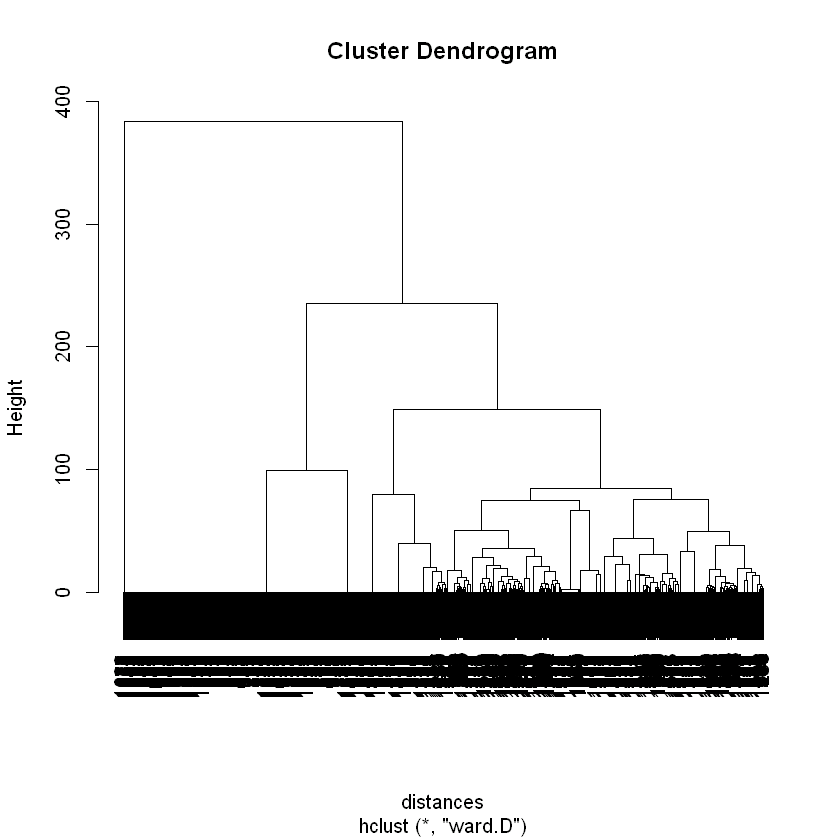

In [21]:
# #Dendrogram
plot(clusterMovies)

In [22]:
# #Using 10 Clusters
clusterGroups = cutree(clusterMovies, k = 10)

In [23]:
tapply(movies$Action, clusterGroups, mean)
tapply(movies$Romance, clusterGroups, mean)

1         2         3         4         5         6         7         8 
0.1784512 0.7839196 0.1238532 0.0000000 0.0000000 0.1015625 0.0000000 0.0000000 
        9        10 
0.0000000 0.0000000

1          2          3          4          5          6          7 
0.10437710 0.04522613 0.03669725 0.00000000 0.00000000 1.00000000 1.00000000 
         8          9         10 
0.00000000 0.00000000 0.00000000

In [24]:
clusterGroups

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    2    3    1    3    4    1    1    4    1    3    3    5    6    4    7 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    4    4    6    1    1    3    3    5    5    2    2    3    4    1    8 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   6    9    1    6    4    2    3    5    5    5    3    3    9    4    9    8 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   7    1    1    4    2    2    6    3    4    4    4    4    4    2    1    4 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   9    7    5    6    1    7    1    1    1    1    8    3    3    1    2    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   7    2    7    2    5    4    4    7    3    6    1    6    9    1    1    2 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   1    3    1    3    2    1    1    5    5    3    4    5    2    1    7    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   4    1    8    5    2    2    8    1    1    5   10    3    6    4    3    2 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   6    3    6    1    1    4    3    4    4    1    1    1    1    1    1    2 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   2    4    2    2    4    9    1    2    5    5    1    3    1    5    3    4 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   6    4    5    2    4    4    5    5    1    6    2    1    2    2    2    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    4    2    1    1    3    2    2    6    1    3    1    1    1    3    4 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   4    1    2    4    6    3    1   10    2    7    1    2    1    2    6   10 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    2    1    4    6    1    4    7    6    3   10    7    4    2    3    4 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   1    2    2    2    2    2    3    1    2    2    1    9    6    5    3    1 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   1    5    1    2    1    6    1    1    5    2    5    2    6    3    7    7 
 257  258  259  260  261  262  263  264  265  266  267  269  270  271  272  273 
   2    1    1    3    1    4    2    2    2    2    1    5    3    1    4    3 
 274  275  276  277  278  279  280  281  282  283  284  285  286  287  288  289 
   7    6    6    4    6    4    6    2    4    6    7    4    1    4   10    1 
 290  291  292  293  294  295  296  297  298  299  300  301  302  304  305  306 
   5    3    4    3    5    2    4    4    2    3    2    5    3    1    4    6 
 307  308  309  310  311  312  313  314  315  316  317  318  319  320  321  322 
   3    1    3    4    6    3    6    1    3    9    4    1    1    8    5    3 
 323  324  325  326  327  328  329  330  331  332  333  334  335  336  337  338 
   2    3    3    1    3    3    3    4    2    3    3    3    5    3    1    5 
 339  340  341  342  343  344  345  346  347  349  350  351  352  353  354  355 
   2    4    5    3    2    4    9    3    9    2    3   10    1    2    7    2 
 356  357  358  359  360  361  362  363  364  365  366  367  368  369  370  371 
   3    4    2    3    8    3    1    2    5    4    4    5    5    5    3    6 
 372  373  374  375  376  377  378  379  380  381  382  383  384  385  386  387 
   5    2    1    4    5    1    4   10    2    7    9    1    5    2    5    4 
 388  389  390  391  392  393  394  395  396  397  398  399  400  401  402  403 
   1    1    5    1    4    5    3

In [25]:
subset(movies, Title=="Men in Black (1997)")
clusterGroups[257]

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
257,Men in Black (1997),0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


257 
  2

In [26]:
cluster2 = subset(movies, clusterGroups==2)

In [27]:
cluster2[1:10]

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama
2,GoldenEye (1995),0,1,1,0,0,0,0,0,0
27,Bad Boys (1995),0,1,0,0,0,0,0,0,0
28,Apollo 13 (1995),0,1,0,0,0,0,0,0,1
38,"Net, The (1995)",0,0,0,0,0,0,0,0,0
53,Natural Born Killers (1994),0,1,0,0,0,0,0,0,0
54,Outbreak (1995),0,1,0,0,0,0,0,0,1
62,Stargate (1994),0,1,1,0,0,0,0,0,0
79,"Fugitive, The (1993)",0,1,0,0,0,0,0,0,0
82,Jurassic Park (1993),0,1,1,0,0,0,0,0,0
84,Robert A. Heinlein's The Puppet Masters (1994),0,0,0,0,0,0,0,0,0


In [28]:
# #Exercise

In [29]:
clusterGroups = cutree(clusterMovies, k = 2)

In [30]:
summary(clusterGroups)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.222   1.000   2.000 

In [31]:
clusterGroups[2]

2 
1

In [32]:
cluster2 = subset(movies, clusterGroups==2)

In [34]:
cluster2

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15,Mr. Holland's Opus (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18,"White Balloon, The (1995)",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19,Antonia's Line (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30,Belle de jour (1967),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
37,Nadja (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
46,Exotica (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
52,"Madness of King George, The (1994)",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
57,Priest (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


ERROR: Error in eval(expr, envir, enclos): object 'cluster3' not found
